# Task 1.1 Data Understanding
*Alberto Roberto Marinelli, Giacomo Cignoni, Alessandro Bucci*
## Importing Libraries
First we import the libraries necessary to analyze the data

In [1]:
import math
import sys
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import decomposition

In [2]:
pd.set_option('mode.use_inf_as_na', True)

def mr_bins(number_of_samples):
    return (np.log2(number_of_samples)).astype('int64') + 1


Then we load the datasets

In [3]:
df_tweets_sample = pd.read_csv('./dataset/tweets.csv', sep=',', index_col=0)  # load tweets
df_users = pd.read_csv('./dataset/users.csv', sep=',', index_col=0)  # load users

In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [5]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13664696 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         object
 1   retweet_count   object
 2   reply_count     object
 3   favorite_count  object
 4   num_hashtags    object
 5   num_urls        object
 6   num_mentions    object
 7   created_at      object
 8   text            object
dtypes: object(9)
memory usage: 1.0+ GB


In [6]:
df_tweets_sample

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!
...,...,...,...,...,...,...,...,...,...
588535254207467520,587491046,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors Congrats, maybe I'll be able to get ..."
580420653666402304,1414080518,0,0,1,0,0,1,2020-03-25 17:27:22,@DaddieEzme fr??
718157017970961,91781300,0,NaN,l25suv5,NaN,0.0,NaN,2016-07-10 22:43:09,NaN


In [7]:
#df_tweets_duplicates = df_tweets_sample[df_tweets_sample['user_id'].duplicated()]
#df_tweets_duplicates.sort_index
#from pandas import Index
#df_tweets_sample.index.duplicated()
#print(df_tweets_sample.index.get_duplicates())

#df_tweets_sample.head(5)

#Selezione da df_tweets_sample dei Tweet duplicati (su campo index)
df_tweets_duplicates = df_tweets_sample[df_tweets_sample.index.isin(df_tweets_sample.index[df_tweets_sample.index.duplicated()])]

#Selezione da df_tweets_duplicates dei Tweet duplicati (su campo user_id)
df_tweets_duplicates = df_tweets_duplicates[df_tweets_duplicates["user_id"].isin(df_tweets_duplicates["user_id"][df_tweets_duplicates["user_id"].duplicated()])]



#Drop duplicati identici (da cui non è possibile fare restore dei dati)
df_tweets_duplicates.drop_duplicates(inplace=True)
df_tweets_duplicates


#Count dei tweets singoli
#count = df_tweets_duplicates['user_id'].value_counts()
#index_count = df_tweets_duplicates.index.value_counts()

#Drop tweets singoli
#df_tweets_duplicates = df_tweets_duplicates[df_tweets_duplicates['user_id'].isin(user_id_count[user_id_count>1].index)]
#df_tweets_duplicates = df_tweets_duplicates[df_tweets_duplicates.index.isin(index_count[index_count>1].index)]

#df_tweets_duplicates.sort_values("user_id")


#Verifica (?) 
#single_data_count = df_tweets_duplicates['user_id'].value_counts()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!
492967265063546880,2599346388,1,0,1,0,0,0,2019-07-28 09:38:49,Where df @Sassy_ileana at man. When she's awak...
...,...,...,...,...,...,...,...,...,...
jkv,370263238,0,NaN,NaN,NaN,NaN,NaN,2020-03-11 16:26:39,NaN
hgjz,181191283,0,0.0,0.0,0.0,NaN,1,2020-03-28 23:07:31,@whitequark what would I check on my 3V supply?
cgx,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2019-02-01 09:49:26,NaN


In [8]:
df_tweets_sample['retweet_count'] = pd.to_numeric(df_tweets_sample['retweet_count'], downcast= 'float', errors='coerce') # After this instruction the column becomes numerics
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13664696 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   retweet_count   float32
 2   reply_count     object 
 3   favorite_count  object 
 4   num_hashtags    object 
 5   num_urls        object 
 6   num_mentions    object 
 7   created_at      object 
 8   text            object 
dtypes: float32(1), object(8)
memory usage: 1.2+ GB


## Features informations
### Users dataset
id, name, lang, bot, created_at and statuses_count
* **id** (*Numerical*)
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer.
* **name** (*Categorical*)
  * Type: **String**
  * Description: The name of the user.
* **lang** (*Categorical*)
  * Type: **String**
  * Description: The user’s language selected
* **bot** (*Numerical*)
  * Type: **Boolean**
  * Description: A binary variable that indicates if a user is a bot or a genuine user
* **created_at** (*Numerical*)
  * Type: **Datetime64**
  * Description: The timestamp of when the user was created
* **statuses_count** (*Numerical*)
  * Type: **Int64**
  * Description: The count of the tweets made by the user at the moment of data crawling.
### Tweets dataset
* **id** (*Numerical*)
  * Type: **Object**
  * Description: Is the identifier of the single tweet, it should be int64, but we decided to consder it object because it does not affect the data if it is not an integer.
* **user_id** (*Numerical*)
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer
* **retweet_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of retweets of the single tweet
* **reply_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of replies of the single tweet
* **favorite_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of favorites (or likes) of the single tweet
* **num_hashtags** (*Numerical*)
  * Type: **Int64**
  * Description: The number of hashtags in the single tweet
* **num_urls** (*Numerical*)
  * Type: **Int64**
  * Description: The number of urls in the single tweet
* **num_mentions** (*Numerical*)
  * Type: **Int64**
  * Description: The number of mentions in the single tweet
* **created_at** (*Numerical*)
  * Type: **Datetime64**
  * Description: The timestamp of when the single tweet was created
* **text** (*Categorical*)
  * Type: **String**
  * Description: The text of the single tweet

# Datatype Casting
## Users dataframe casting

In [9]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


Cast name and lang columns to string and created_at to DateTime in df_users

In [10]:
df_users.name = df_users.name.astype('string')
df_users.lang = df_users.lang.astype('string')


Showing how 'lang' is composed with a logarithmic scale bar plot

Langs in the user dataset:
en                    0.866354
it                    0.078728
es                     0.02772
pt                    0.005648
en-gb                 0.004345
ru                     0.00365
fr                    0.003128
ja                    0.002868
zh-tw                 0.001477
tr                    0.001217
id                    0.001043
ko                    0.000782
de                    0.000695
nl                    0.000521
en-GB                 0.000348
ar                    0.000261
zh-TW                 0.000261
da                    0.000174
Select Language...    0.000174
en-AU                 0.000087
zh-cn                 0.000087
pl                    0.000087
el                    0.000087
fil                   0.000087
sv                    0.000087
xx-lc                 0.000087
Name: lang, dtype: Float64


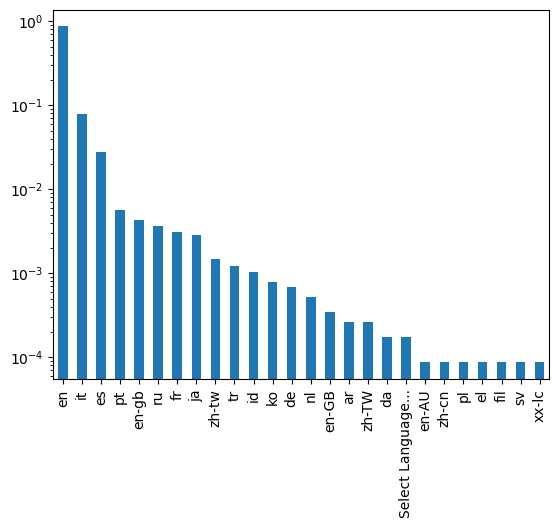

In [11]:
lang_distribution = df_users.lang.value_counts(normalize=True)
print('Langs in the user dataset:')
print(lang_distribution)

lang_distribution.plot(kind="bar")
plt.yscale('log')

We decided that if the lang contains a dash, we'll take into consideration only the lang before it.

E.g.: "en-gb" will become "en", "zh-tw" will become "zh".

In [12]:
import re

def lang_correction(lang_string):
    lang = lang_string
    lang = re.sub('-.*$', '', lang)

    return lang

df_users.lang = df_users.lang.apply(lang_correction)


Substituting "Select Language..." with the mode. 

In [13]:
df_users.lang.replace(to_replace="Select Language...",value=df_users.lang.mode()[0], inplace=True)

We looked at the tweets with the user id equal to the one who has 'lang' equal to xx, and determined that theier posts were english, so we changed 'lang' to 'en', which is also the mode.

TODO: check if other strange languages in full tweets dataset

In [14]:
df_users.lang.replace(to_replace="xx",value=df_users.lang.mode()[0], inplace=True)

Displaying the cleaned 'lang' in log scale:

Langs in the user dataset:
en     0.871394
it     0.078728
es     0.027720
pt     0.005648
ru     0.003650
fr     0.003128
ja     0.002868
zh     0.001825
tr     0.001217
id     0.001043
ko     0.000782
de     0.000695
nl     0.000521
ar     0.000261
da     0.000174
pl     0.000087
el     0.000087
fil    0.000087
sv     0.000087
Name: lang, dtype: float64


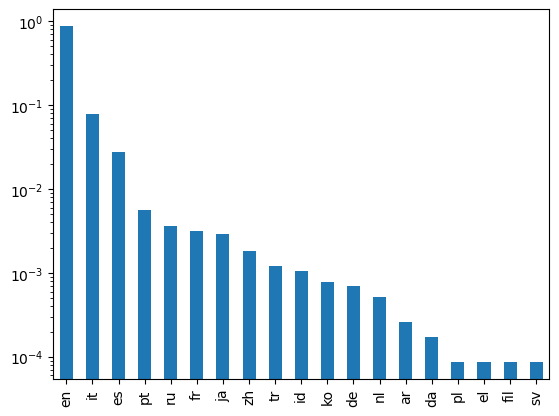

In [15]:
lang_distribution = df_users.lang.value_counts(normalize=True)
print('Langs in the user dataset:')
print(lang_distribution)

lang_distribution.plot(kind="bar")
plt.yscale('log')

Cast statuses_count to Int64, bot to bool and created_at to DateTime in df_users

In [16]:
df_users.statuses_count = df_users.statuses_count.astype('Int64', errors='raise')
df_users.bot = df_users.bot.astype('bool', errors='raise')
df_users.created_at = pd.to_datetime(df_users.created_at, errors='coerce')


In [17]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            11507 non-null  string        
 1   lang            11508 non-null  object        
 2   bot             11508 non-null  bool          
 3   created_at      11508 non-null  datetime64[ns]
 4   statuses_count  11109 non-null  Int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), object(1), string(1)
memory usage: 472.0+ KB


## Tweets dataframe casting

Int64 casting for numeric columns in df_tweets

In [25]:
# Define max and min for Int64
max_int = np.iinfo(np.int64).max
min_int = np.iinfo(np.int64).min

def substitute_int(x):
    if x < max_int or x > min_int:
        print(x)
        return x
    else:
        return pd.NA

for col_name in df_tweets_sample.iloc[:, : 7]:
    # Cast objects to float. after this instruction the column becomes numerics
    df_tweets_sample[col_name] = pd.to_numeric(df_tweets_sample[col_name], downcast= 'integer', errors='coerce')

    # Substitute values outside of Int64 limits with NaN
    df_tweets_sample[col_name] = df_tweets_sample[col_name].apply(substitute_int)

    # Cast to Int64
    df_tweets_sample[col_name] = df_tweets_sample[col_name].astype('Int64', errors='ignore')



Cast text column to string and created_at to DateTime in df_tweets

In [ ]:
df_tweets_sample.text = df_tweets_sample.text.astype('string')
df_tweets_sample.created_at = pd.to_datetime(df_tweets_sample.created_at, errors='coerce')

In [ ]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         132272 non-null  Int64         
 1   retweet_count   130362 non-null  Int64         
 2   reply_count     128457 non-null  Int64         
 3   favorite_count  128519 non-null  Int64         
 4   num_hashtags    124949 non-null  Int64         
 5   num_urls        128514 non-null  Int64         
 6   num_mentions    126737 non-null  Int64         
 7   created_at      136647 non-null  datetime64[ns]
 8   text            131286 non-null  string        
dtypes: Int64(7), datetime64[ns](1), string(1)
memory usage: 16.3+ MB


<AxesSubplot:ylabel='id'>

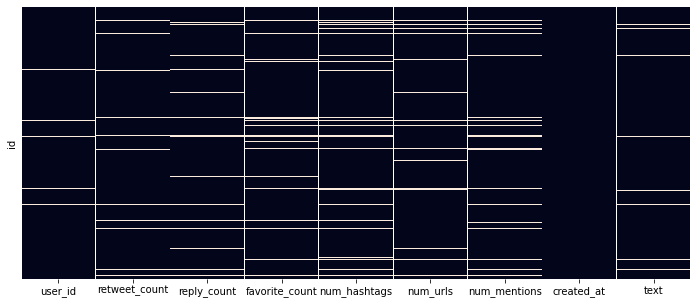

In [ ]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets_sample.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)

Drop tweets where user_id is NaN

In [ ]:
df_tweets_sample.dropna(subset=['user_id'], how='any', inplace=True)

# Joining tables
Joining the tables to make sure we work only on the user into the user DB

In [ ]:
#df_joined = df_tweets_sample.join(df_users, on='user_id', how='inner', lsuffix='_tweet', rsuffix='_user')
df_joined = df_tweets_sample.join(df_users, on='user_id', how='inner', lsuffix='_tweet', rsuffix='_user')

In [ ]:
df_joined.num_hashtags = df_joined.num_hashtags.astype('Int64')
df_joined.num_mentions = df_joined.num_mentions.astype('Int64')
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10579 entries, 46646049035625229 to 20257469400702069
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           10579 non-null  Int64         
 1   retweet_count     10225 non-null  Int64         
 2   reply_count       10167 non-null  Int64         
 3   favorite_count    10147 non-null  Int64         
 4   num_hashtags      9984 non-null   Int64         
 5   num_urls          10160 non-null  Int64         
 6   num_mentions      10069 non-null  Int64         
 7   created_at_tweet  10579 non-null  datetime64[ns]
 8   text              10327 non-null  string        
 9   name              10579 non-null  string        
 10  lang              10579 non-null  object        
 11  bot               10579 non-null  bool          
 12  created_at_user   10579 non-null  datetime64[ns]
 13  statuses_count    10577 non-null  Int64         
dtyp

Function that returns the substitute attribute of a tweet. It ish the median value of the attribute of other tweets of the same user, if there are enough valid tweets, otherwise it is the median value from users which have same 'bot' attribute

# Outliers Detection

We now explore the distributions in order to find the outliers of each attribute.

## User Outliers

We check 'created_at' whit a bar plot by year.

<AxesSubplot:xlabel='created_at'>

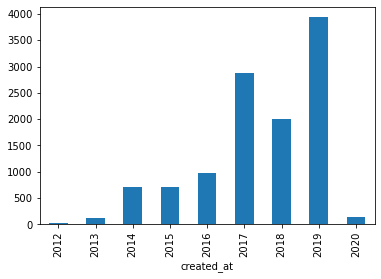

In [ ]:
df_users.created_at.groupby(df_users.created_at.dt.year).count().plot(kind='bar')

Since Twitter was founded in 2006 and the oldest user is from 2012, there are no lower bound outliers.

Since the crawling was done in 2020, and there are no users created later than 2020, there are no upper bound outliers.

Now we check "statuses_count"

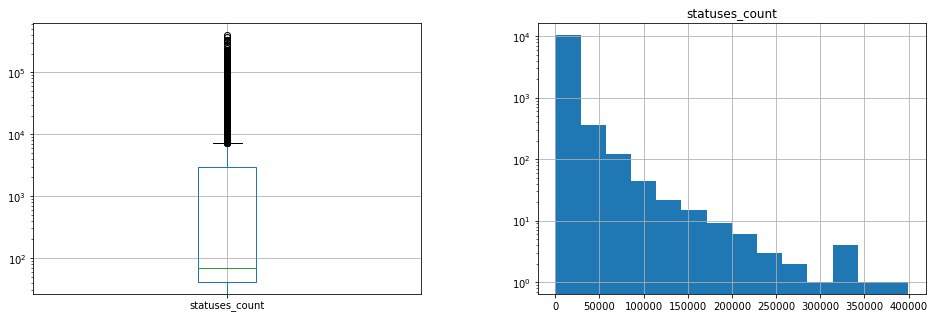

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_users.boxplot(column="statuses_count", ax=ax1)
ax1.set_yscale('log')
df_users.hist(column="statuses_count", ax=ax2, stacked=True, bins=mr_bins(df_users.statuses_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)


There are no outliers, because there is no limit on how much a user can publish in a given period of time and also there are not negative values that would be invalid.

## Tweets Outliers

In [ ]:
#Da eliminare
Q1 = df_tweets_sample.quantile(0.25)  # first quartile
Q3 = df_tweets_sample.quantile(0.75)  # third quartile
InterQRange = Q3 - Q1  # interquartile range

lower_bound = (Q1 - 1.5 * InterQRange).astype('int64')  
median = (df_tweets_sample.quantile(0.5)).astype('int64') 
upper_bound = (Q3 + 1.5 * InterQRange).astype('int64')

Now we check "retweet_count"

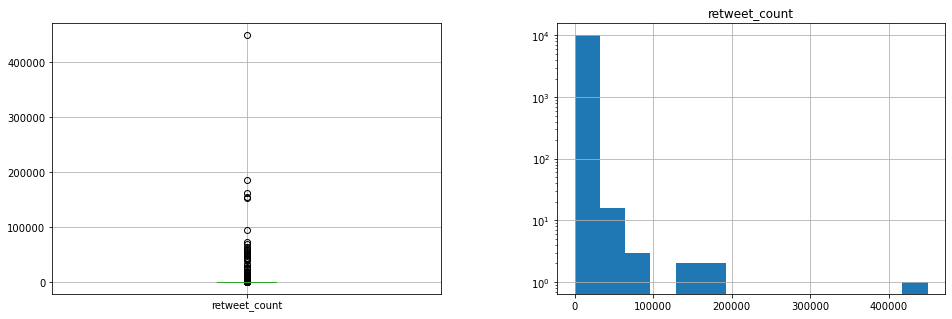

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_joined.boxplot(column="retweet_count", ax=ax1)
#ax1.set_yscale('log')
df_joined.hist(column="retweet_count", ax=ax2, stacked=True, bins=mr_bins(df_joined.retweet_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)

The most retweet tweet has more than 4*10^6 retweets, so we not consider a retweet count over that threshold

'reply_count'

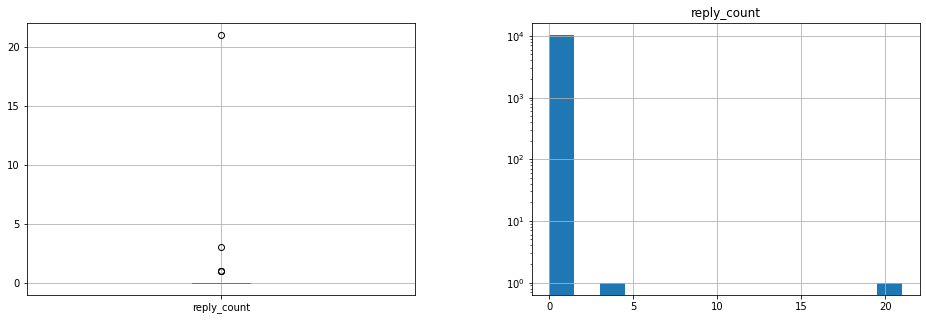

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_joined.boxplot(column="reply_count", ax=ax1)
#ax1.set_yscale('log')
df_joined.hist(column="reply_count", ax=ax2, stacked=True, bins=mr_bins(df_joined.reply_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)

'favorite_count'

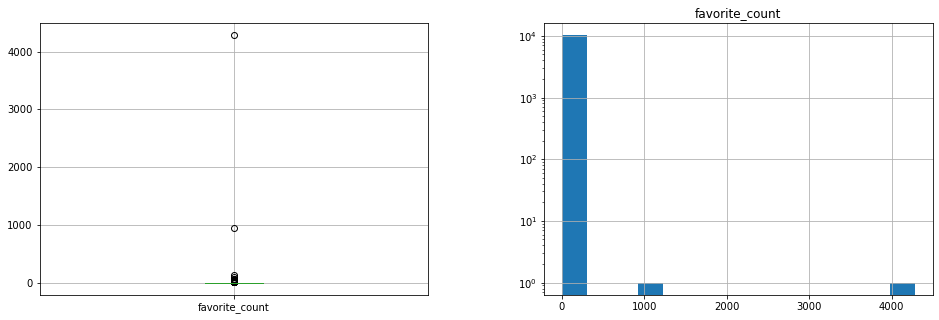

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_joined.boxplot(column="favorite_count", ax=ax1)
#ax1.set_yscale('log')
df_joined.hist(column="favorite_count", ax=ax2, stacked=True, bins=mr_bins(df_joined.favorite_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)

'num_hashtags', since the max char in a tweet is 280, we decided to replace with the median number of hashtags everything that is above that threshold

In [ ]:
df_tweets_sample.num_hashtags = df_tweets_sample.num_hashtags.apply(lambda x: x if x < 280 else df_tweets_sample.num_hashtags.median())

TypeError: boolean value of NA is ambiguous

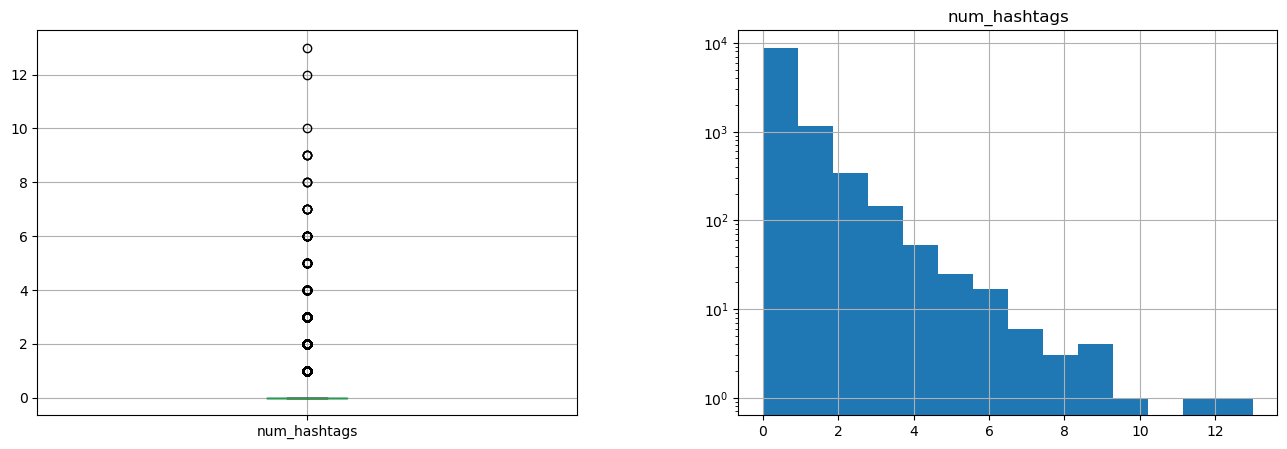

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_joined.boxplot(column="num_hashtags", ax=ax1)
#ax1.set_yscale('log')
df_joined.hist(column="num_hashtags", ax=ax2, stacked=True, bins=mr_bins(df_joined.retweet_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)

'num_mentions' since the max char in a tweet is 280, and since a mention to a user needs a @ before the user's nickname (which could be just a letter) we decided to replace with the median number of hashtags everything that is above 280/2.

In [ ]:
df_joined.num_mentions = df_joined.num_mentions.apply(lambda x: x if x < 140 else df_joined.num_mentions.median())

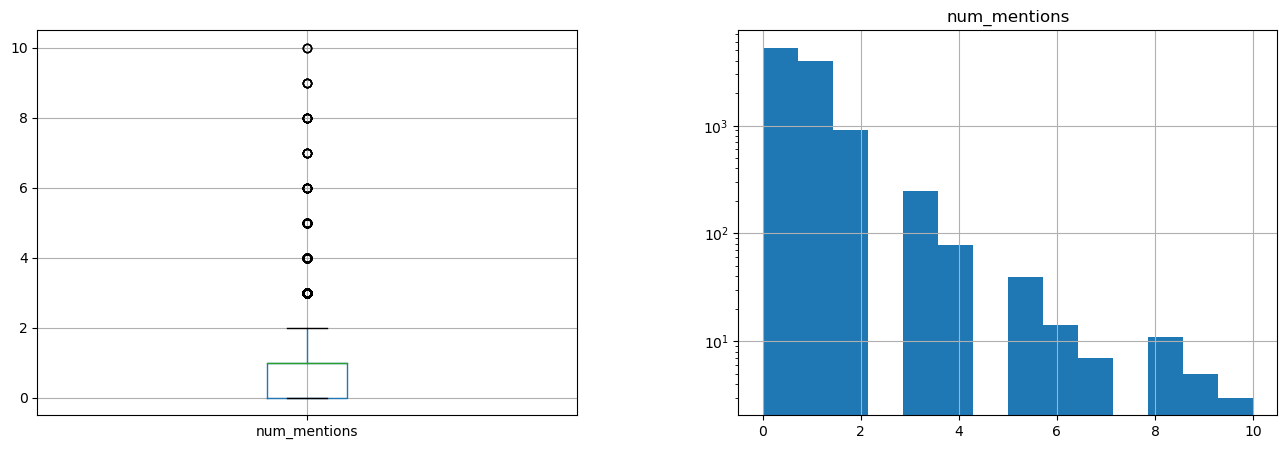

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_joined.boxplot(column="num_mentions", ax=ax1)
#ax1.set_yscale('log')
df_joined.hist(column="num_mentions", ax=ax2, stacked=True, bins=mr_bins(df_joined.num_mentions.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)

'created_at' since Twitter was founded in 2006 and we are in 2022, we decided to substitute the years that are outside of this range with the median for the single user, if the date is still outside of the limits, we set the date to 1972 (which is a leap year, since we don't want any February 29th problems to occur).

In [ ]:
def fix_year(row):
    tweet_creation_date = row.created_at_tweet
    min_date = np.datetime64('2006-07-15 00:00:00')
    max_date = np.datetime64('2020-12-31 23:59:59')
    
    if tweet_creation_date < min_date or tweet_creation_date > max_date:
        tweet_creation_date = row.created_at_tweet.replace(pd.NA)

    return tweet_creation_date

df_joined.created_at_tweet = df_joined.apply(fix_year, axis=1)

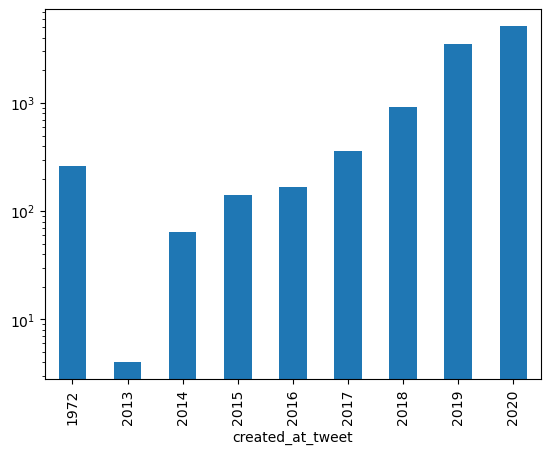

In [ ]:
df_joined.created_at_tweet.groupby(df_joined.created_at_tweet.dt.year).count().plot(kind='bar')
plt.yscale('log')

# Manage NaN

Fill the NaN in the numeric columns

AttributeError: 'Series' object has no attribute 'columns'

Create Dataframe with count of valid (== non-null) numeric tweet attributes grouped by users

In [ ]:
df_grouped_by_user_num_valid = df_joined.groupby(['user_id']).count().iloc[:, 0 : 6]
new_labels = ['num_valid_retweet_count', 'num_valid_reply_count', 'num_valid_favorite_count',
'num_valid_num_hashtags', 'num_valid_num_urls', 'num_valid_num_mentions']
df_grouped_by_user_num_valid.columns = new_labels

Create Dataframe with median value of numeric tweet attributes grouped by users

In [ ]:
df_grouped_by_user_median = df_joined.groupby(['user_id']).median().iloc[:, 0 : 6]
new_labels = ['median_retweet_count', 'median_reply_count', 'median_favorite_count',
'median_num_hashtags', 'median_num_urls', 'median_num_mentions']
df_grouped_by_user_median.columns = new_labels

Merge the previously generated Dataframes to form a user group-by dataframe

In [ ]:
df_grouped_by_user = df_grouped_by_user_median.join(df_grouped_by_user_num_valid, on='user_id',
 how='inner', lsuffix='_median', rsuffix='_num_valid')

In [ ]:
print(df_joined.groupby(['user_id']).count())
df_grouped_by_user = df_joined.groupby(['user_id']).median()
df_grouped_by_user.insert(loc=0, column='num_tweets', value=df_joined.groupby(['user_id']).count())
df_grouped_by_user.info()

            retweet_count  reply_count  favorite_count  num_hashtags  \
user_id                                                                
678033                 34           34              34            34   
722623                 28           28              28            28   
755116                 26           26              26            26   
755746                 23           23              23            23   
785080                 35           35              35            35   
...                   ...          ...             ...           ...   
2381821184              3            3               3             3   
2644167680             49           51              48            50   
2963287552             44           40              42            41   
3092750592             18           17              18            18   
3140211968             10           10              10            10   

            num_urls  num_mentions  created_at_tweet  text  nam

ValueError: Wrong number of items passed 13, placement implies 1

In [ ]:
def subsititue_with_median(row, col_name, bot_median, not_bot_median, min_valid_user_values):
    if pd.isnull(row[col_name]):
        num_valid_col_name = 'num_valid_' + col_name
        num_valid_col_name = 'num_valid_' + col_name
        # If there are at least a min number of user tweets with valid attribute
        if .count() > min_valid_user_values:
            # Use median of attribute of same user tweets
            row[col_name] = tweets_of_same_user[col_name].median().astype(np.int64)
        # Else use median of bot/not_bot
        elif row['bot'] == True:
            row[col_name] = bot_median
        else:
            row[col_name] = not_bot_median
    return row

In [ ]:
# Minimum value of other tweets with not-NaN feature
min_valid_user_values = 4 #da calcolare eventualmente

for col_name in df_tweets_sample.iloc[:, 1 : 7]:
    
    # Calculate median on the feature for bots and not-bots
    bot_median = df_joined.loc[df_joined['bot'] == True][col_name].median().astype(np.int64)
    not_bot_median = df_joined.loc[df_joined['bot'] == False][col_name].median().astype(np.int64)
    print('bot median {}:'.format(col_name), bot_median)
    print('not bot median {}:'.format(col_name), not_bot_median)

    df_joined.apply(
        func=subsititue_with_median, axis=1, args=(col_name, bot_median, not_bot_median, min_valid_user_values))

bot median retweet_count: 0
not bot median retweet_count: 0
bot median reply_count: 0
not bot median reply_count: 0
bot median favorite_count: 0
not bot median favorite_count: 0
bot median num_hashtags: 0
not bot median num_hashtags: 0
bot median num_urls: 0
not bot median num_urls: 0
bot median num_mentions: 0
not bot median num_mentions: 1


As statuses_count in df_users contains only tweet count and not replies, while df_tweets contains also replies, we cannot estimate NaN statuses_count with the number of the users tweets, so we fill those NaNs with median

In [ ]:
median = df_users.statuses_count.median().astype(np.int64)
print(median)
df_users.statuses_count.fillna(median, inplace=True)

68


Fill NaN name in df_users  with ""

In [ ]:
df_users.name.fillna("", inplace=True)

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            11508 non-null  string        
 1   lang            11508 non-null  object        
 2   bot             11508 non-null  bool          
 3   created_at      11508 non-null  datetime64[ns]
 4   statuses_count  11508 non-null  Int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), object(1), string(1)
memory usage: 472.0+ KB
